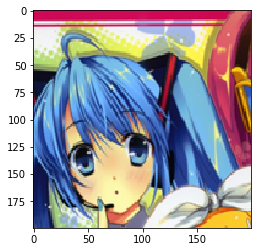

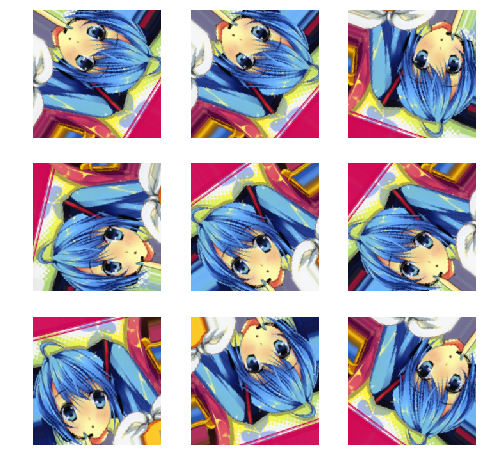

[[[0.36738384 0.06697261 0.22878997]
  [0.4117647  0.09803922 0.2509804 ]
  [0.4117647  0.09803922 0.2509804 ]
  ...
  [0.45223448 0.45176336 0.5607047 ]
  [0.47058824 0.48235294 0.5882353 ]
  [0.47058824 0.48235294 0.5882353 ]]

 [[0.3260902  0.04168862 0.20597018]
  [0.3510466  0.05553653 0.22062133]
  [0.39773244 0.08821663 0.24396427]
  ...
  [0.46624026 0.4751063  0.5817133 ]
  [0.47058824 0.48235294 0.5882353 ]
  [0.46893215 0.4707604  0.58492315]]

 [[0.31508192 0.04057212 0.19607843]
  [0.32200587 0.04087177 0.20270275]
  [0.33470935 0.04410046 0.21245271]
  ...
  [0.47058824 0.48235294 0.5882353 ]
  [0.46974903 0.47647846 0.5865569 ]
  [0.46625388 0.45428276 0.57997936]]

 ...

 [[0.8110397  0.04705882 0.33333334]
  [0.80788857 0.04705882 0.33333334]
  [0.81405467 0.05327033 0.33954483]
  ...
  [0.5882353  0.07450981 0.20392157]
  [0.5882353  0.07450981 0.20392157]
  [0.5720517  0.07219786 0.19698575]]

 [[0.8087054  0.04705882 0.33333334]
  [0.8124209  0.0516366  0.33791113]


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#kerasインポート
from keras.models import model_from_json
from keras.models import Sequential
from keras.preprocessing.image import img_to_array, array_to_img, load_img, random_rotation, random_zoom, random_shift
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPool2D
from keras.layers.core import Dense,Activation,Dropout,Flatten
from keras.utils import np_utils


%matplotlib inline

#------------変数宣言------------
img_size = 200

#csvのファイルパスを記載
csv_filepath = 'filename_test.csv'

#水増し処理の種類を記載
img_pro = 4

#------------処理ここから------------


#csvからファイルパスを読み込む
csv_file = pd.read_csv(csv_filepath, encoding="UTF-8")#もしくわUTF-8

#csvに記載しているファイルパス、ラベル、総数を格納
fnames = csv_file['filepath']
labels = csv_file['label']
fnames_total = len(fnames)

#データセットを格納する変数の初期化
img_train = np.zeros((fnames_total,img_size,img_size,3))

#データセットの格納
#前処理する場合はここでやる
for i,fname in enumerate(fnames):

    temp_img = load_img(fname,target_size=(img_size,img_size))
    #0-1で正規化した状態で、配列に格納する
    img_train[i] = img_to_array(temp_img)/255

#水増し前の画像の表示
plt.imshow(img_train[0])
plt.show()

#水増し処理を行う
#ImageDataGeneratorの生成
datagen = ImageDataGenerator(rotation_range=180)

gen = datagen.flow(img_train, batch_size=1) 
# Python ジェネレーターで9枚生成して、表示する。
plt.figure(figsize=(8, 8))
for i in range(9):
    batches = next(gen)  # (NumBatches, Height, Width, Channels) の4次元データを返す。
    # 画像として表示するため、3次元データにし、float から uint8 にキャストする。
    gen_img = batches[0]

    plt.subplot(3, 3, i + 1)
    plt.imshow(gen_img)
    plt.axis('off')
plt.show()
